# Installing packages

In [1]:
pip install nbconvert[webpdf]

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib pandas numpy sns scipy sklearn nbconvert openpyxl termcolor

Note: you may need to restart the kernel to use updated packages.


# Importing Libraries

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
from numpy.random import randn
import numpy as np
from scipy import stats
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t
from termcolor import colored

In [4]:
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
 # calculate means
 mean1, mean2 = mean(data1), mean(data2)
 # calculate standard errors
 se1, se2 = sem(data1), sem(data2)
 # standard error on the difference between the samples
 sed = sqrt(se1**2.0 + se2**2.0)
 # calculate the t statistic
 t_stat = (mean1 - mean2) / sed
 # degrees of freedom
 df = len(data1) + len(data2) - 2
 # calculate the critical value
 cv = t.ppf(1.0 - alpha, df)
 # calculate the p-value
 p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
 # return everything
 return t_stat, df, cv, p

## Toy Samples

In [5]:
mu2, sigma2 = 25, 5 # mean and standard deviation
s2 = np.random.normal(mu2, sigma2, 5000)
mu, sigma = 30, 5 # mean and standard deviation
s = np.random.normal(mu, sigma, 5000)
zz = [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]

# Population

In [6]:
df = pd.read_excel('DBGeneticExpressionOvaries.xlsx')
df['Group'] = df['Amostra'].apply(lambda x: x[0])
df['Day'] = df['Amostra'].apply(lambda x: int(x[1]) if x[1] != 'u' else 0)
df.head()

,Amostra,RPL32,VGR,VG,Group,Day
0,A1-1,19.178,26.597,28.589,A,1
1,A1-1,19.206,26.662,28.752,A,1
2,A1-2,18.391,28.084,30.028,A,1
3,A1-2,18.282,28.165,29.857,A,1
4,A1-3,18.034,25.990,28.405,A,1


In [7]:
df[df['VG'].isna()]

,Amostra,RPL32,VGR,VG,Group,Day
19,Pu-1,19.253,27.473,NaN,P,0


In [8]:
df[df['Amostra'] == 'Pu-1']['VG'].mean() 

35.748

In [9]:
df[df['Amostra'] == 'Pu-1']['VG'] = df[df['Amostra'] == 'Pu-1']['VG'].mean() 

C:\Users\waner\AppData\Local\Temp\ipykernel_20576\3029813970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Amostra'] == 'Pu-1']['VG'] = df[df['Amostra'] == 'Pu-1']['VG'].mean()


In [10]:
df.describe()

,RPL32,VGR,VG,Day
count,78.000000,78.00000,77.000000,78.000000
mean,18.600436,26.19741,29.356403,4.000000
std,0.843461,1.67892,2.980935,3.006486
min,16.984000,23.14400,23.278000,0.000000
25%,17.979000,25.02800,28.038000,1.000000
50%,18.638000,26.13050,28.683000,4.000000
75%,19.276250,27.14975,30.028000,8.000000
max,20.269000,31.17200,40.000000,8.000000


In [11]:
df_mean = df # df.groupby(['Amostra', 'Group']).mean().reset_index()

In [12]:
df_mean

,Amostra,RPL32,VGR,VG,Group,Day
0,A1-1,19.178,26.597,28.589,A,1
1,A1-1,19.206,26.662,28.752,A,1
2,A1-2,18.391,28.084,30.028,A,1
3,A1-2,18.282,28.165,29.857,A,1
4,A1-3,18.034,25.990,28.405,A,1
...,...,...,...,...,...,...
73,D8-1,19.539,27.053,29.749,D,8
74,D8-2,19.284,25.174,28.861,D,8
75,D8-2,19.376,25.148,28.742,D,8
76,D8-3,17.977,24.007,27.672,D,8


Each distribution is a total of eggs layed during 10 days for each female individual

In [13]:
df_mean['DCT_VG'] =  df_mean['VG'] - df_mean['RPL32']
df_mean['DCT_VGR'] =  df_mean['VGR'] - df_mean['RPL32']
df_mean.head()

,Amostra,RPL32,VGR,VG,Group,Day,DCT_VG,DCT_VGR
0,A1-1,19.178,26.597,28.589,A,1,9.411,7.419
1,A1-1,19.206,26.662,28.752,A,1,9.546,7.456
2,A1-2,18.391,28.084,30.028,A,1,11.637,9.693
3,A1-2,18.282,28.165,29.857,A,1,11.575,9.883
4,A1-3,18.034,25.990,28.405,A,1,10.371,7.956


In [14]:
df_mean['DDCT_VG'] =  df_mean['DCT_VG'] - df_mean['DCT_VG'].min() 
df_mean['DDCT_VGR'] =  df_mean['DCT_VGR'] - df_mean['DCT_VGR'].min()
df_mean.head()

,Amostra,RPL32,VGR,VG,Group,Day,DCT_VG,DCT_VGR,DDCT_VG,DDCT_VGR
0,A1-1,19.178,26.597,28.589,A,1,9.411,7.419,5.095,1.984
1,A1-1,19.206,26.662,28.752,A,1,9.546,7.456,5.230,2.021
2,A1-2,18.391,28.084,30.028,A,1,11.637,9.693,7.321,4.258
3,A1-2,18.282,28.165,29.857,A,1,11.575,9.883,7.259,4.448
4,A1-3,18.034,25.990,28.405,A,1,10.371,7.956,6.055,2.521


In [15]:
df_mean['EXP_DDCT_VG'] =  df_mean['DDCT_VG'].apply(lambda x: 2**(-x)) 
df_mean['EXP_DDCT_VGR'] =  df_mean['DDCT_VGR'].apply(lambda x: 2**(-x)) 
df_mean.head()

,Amostra,RPL32,VGR,VG,Group,Day,DCT_VG,DCT_VGR,DDCT_VG,DDCT_VGR,EXP_DDCT_VG,EXP_DDCT_VGR
0,A1-1,19.178,26.597,28.589,A,1,9.411,7.419,5.095,1.984,0.029259,0.252788
1,A1-1,19.206,26.662,28.752,A,1,9.546,7.456,5.230,2.021,0.026645,0.246387
2,A1-2,18.391,28.084,30.028,A,1,11.637,9.693,7.321,4.258,0.006254,0.052265
3,A1-2,18.282,28.165,29.857,A,1,11.575,9.883,7.259,4.448,0.006529,0.045816
4,A1-3,18.034,25.990,28.405,A,1,10.371,7.956,6.055,2.521,0.015041,0.174222


## Sanity Test

In [16]:
def interpret_ttest(a, b, alpha=0.05):
    t_stat, df, cv, p = independent_ttest(a, b, alpha)
    print('t=%.3f, df=%d, cv=%.5f, p=%.8f' % (t_stat, df, cv, p))
#     # interpret via critical value
#     if abs(t_stat) <= cv:
#         print('Accept null hypothesis (Same distributions).')
#     else:
#         print('Reject the null hypothesis (Different distributions).')
    # interpret via p-value
    if p > alpha:
        print(colored('Accept null hypothesis (Same distributions).', 'green'))
    else:
        print(colored('Reject the null hypothesis (Different distributions).', 'red'))

In [17]:
interpret_ttest(s,s2)

t=50.674, df=9998, cv=1.64501, p=0.00000000
Reject the null hypothesis (Different distributions).


In [18]:
def interpret_kwtest(a, b, alpha = 0.05):
    stat, p = stats.kruskal(a, b)
    print('Statistics=%.3f, p=%.8f' % (stat, p))
    # interpret

    if p > alpha:
        print(colored('Same distributions (fail to reject H0)', 'green'))
    else:
        print(colored('Different distributions (reject H0)', 'red'))

In [19]:
interpret_kwtest(s,s2)

Statistics=2073.767, p=0.00000000
Different distributions (reject H0)


In [20]:
from scipy.stats import shapiro
# normality test
# interpret results
def interpret_normaltest(data, alpha=0.05):
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))

    if p > alpha:
        print(colored('Sample looks Gaussian (fail to reject H0)', 'green'))
    else:
        print(colored('Sample does not look Gaussian (reject H0)', 'red'))



In [21]:
interpret_normaltest(s)

Statistics=1.000, p=0.586
Sample looks Gaussian (fail to reject H0)


In [22]:
interpret_normaltest(s2)

Statistics=1.000, p=0.698
Sample looks Gaussian (fail to reject H0)


In [23]:
interpret_normaltest(zz)

Statistics=0.236, p=0.000
Sample does not look Gaussian (reject H0)


## Normality Tests

In [24]:
df_mean.head()

,Amostra,RPL32,VGR,VG,Group,Day,DCT_VG,DCT_VGR,DDCT_VG,DDCT_VGR,EXP_DDCT_VG,EXP_DDCT_VGR
0,A1-1,19.178,26.597,28.589,A,1,9.411,7.419,5.095,1.984,0.029259,0.252788
1,A1-1,19.206,26.662,28.752,A,1,9.546,7.456,5.230,2.021,0.026645,0.246387
2,A1-2,18.391,28.084,30.028,A,1,11.637,9.693,7.321,4.258,0.006254,0.052265
3,A1-2,18.282,28.165,29.857,A,1,11.575,9.883,7.259,4.448,0.006529,0.045816
4,A1-3,18.034,25.990,28.405,A,1,10.371,7.956,6.055,2.521,0.015041,0.174222


In [25]:
groups = df_mean.Group.unique()
groups

array(['A', 'P', 'B', 'C', 'D'], dtype=object)

In [26]:
distributions_vg  = {g: df_mean[df_mean['Group'] == g]['EXP_DDCT_VG'].values for g in groups}
distributions_vgr  = {g: df_mean[df_mean['Group'] == g]['EXP_DDCT_VGR'].values for g in groups}

## Normality Test for VG 

In [27]:
df_mean

,Amostra,RPL32,VGR,VG,Group,Day,DCT_VG,DCT_VGR,DDCT_VG,DDCT_VGR,EXP_DDCT_VG,EXP_DDCT_VGR
0,A1-1,19.178,26.597,28.589,A,1,9.411,7.419,5.095,1.984,0.029259,0.252788
1,A1-1,19.206,26.662,28.752,A,1,9.546,7.456,5.230,2.021,0.026645,0.246387
2,A1-2,18.391,28.084,30.028,A,1,11.637,9.693,7.321,4.258,0.006254,0.052265
3,A1-2,18.282,28.165,29.857,A,1,11.575,9.883,7.259,4.448,0.006529,0.045816
4,A1-3,18.034,25.990,28.405,A,1,10.371,7.956,6.055,2.521,0.015041,0.174222
...,...,...,...,...,...,...,...,...,...,...,...,...
73,D8-1,19.539,27.053,29.749,D,8,10.210,7.514,5.894,2.079,0.016816,0.236678
74,D8-2,19.284,25.174,28.861,D,8,9.577,5.890,5.261,0.455,0.026078,0.729510
75,D8-2,19.376,25.148,28.742,D,8,9.366,5.772,5.050,0.337,0.030186,0.791686
76,D8-3,17.977,24.007,27.672,D,8,9.695,6.030,5.379,0.595,0.024030,0.662044


In [28]:
df_mean.to_excel('ovaries_exp_ddct.xlsx')

In [29]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
for k, v in distributions_vg.items():
    print(f'Distributions {k}')
    interpret_normaltest(v)
#     plt.hist(v, bins=7)
#     plt.gca().set(ylabel='Frequency')
#     plt.title(k)
#     plt.show()
    print('\n\n')

Distributions A
Statistics=0.942, p=0.319
Sample looks Gaussian (fail to reject H0)



Distributions P
Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)



Distributions B
Statistics=0.843, p=0.006
Sample does not look Gaussian (reject H0)



Distributions C
Statistics=0.392, p=0.000
Sample does not look Gaussian (reject H0)



Distributions D
Statistics=0.668, p=0.000
Sample does not look Gaussian (reject H0)





## Normality Test for VGR


Distributions A
Statistics=0.844, p=0.007
Sample does not look Gaussian (reject H0)


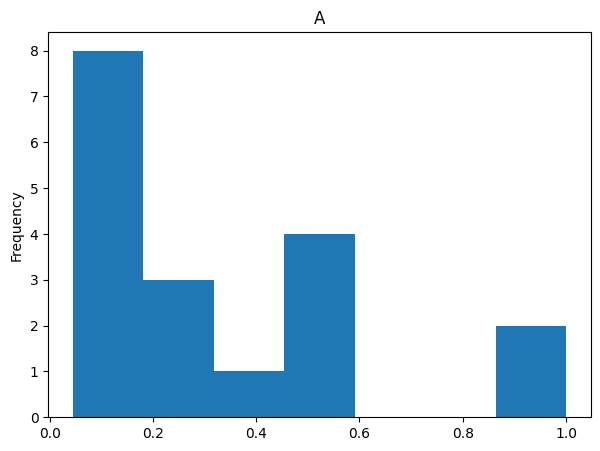




Distributions P
Statistics=0.828, p=0.102
Sample looks Gaussian (fail to reject H0)


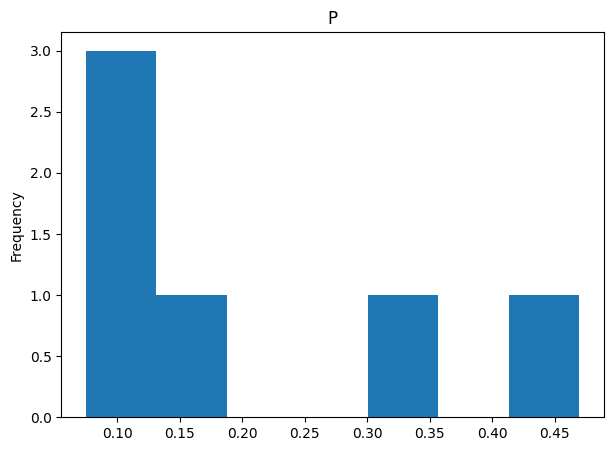




Distributions B
Statistics=0.791, p=0.001
Sample does not look Gaussian (reject H0)


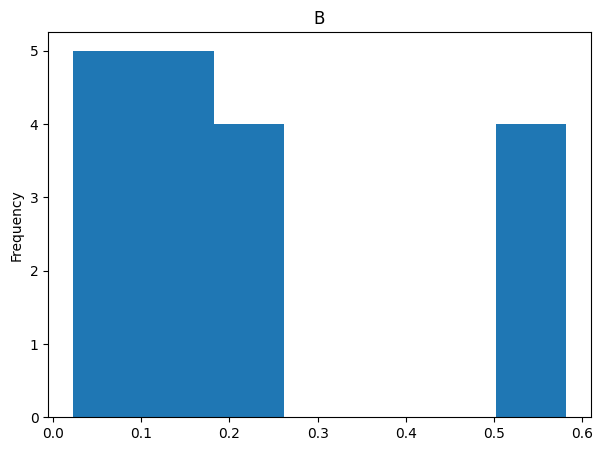




Distributions C
Statistics=0.925, p=0.161
Sample looks Gaussian (fail to reject H0)


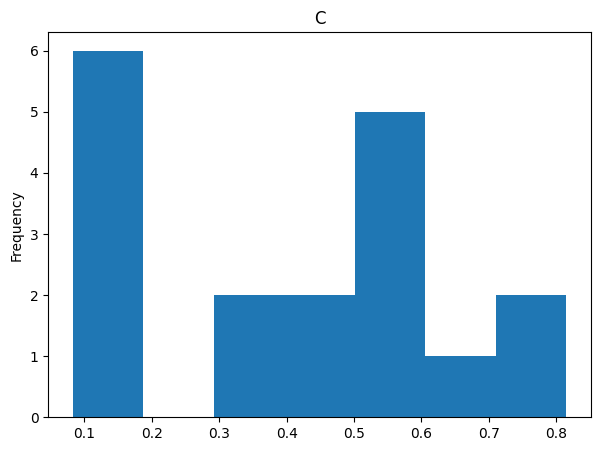




Distributions D
Statistics=0.853, p=0.010
Sample does not look Gaussian (reject H0)


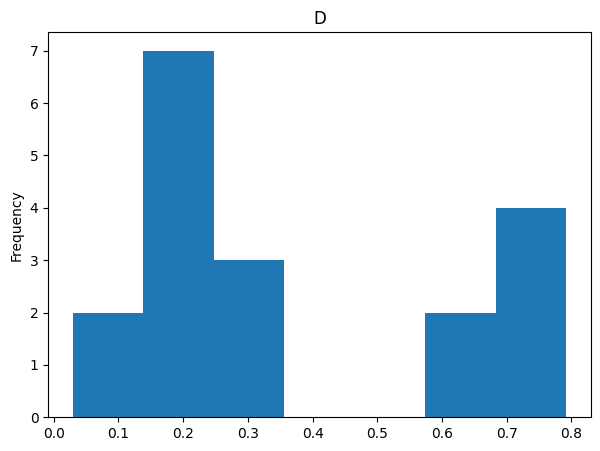

In [30]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
for k, v in distributions_vgr.items():
    print(f'Distributions {k}')
    interpret_normaltest(v)
    plt.hist(v, bins=7)
    plt.gca().set(ylabel='Frequency')
    plt.title(k)
    plt.show()
    print('\n\n')

## Comparison Scenarios

In [31]:
scenarios_vgr_inter_group = {
'A-B': (distributions_vgr['A'], distributions_vgr['B']), 
'A-C': (distributions_vgr['A'], distributions_vgr['C']), 
'A-D': (distributions_vgr['A'], distributions_vgr['D']), 
'A-P': (distributions_vgr['A'], distributions_vgr['P']), 
'B-C': (distributions_vgr['B'], distributions_vgr['C']), 
'B-D': (distributions_vgr['B'], distributions_vgr['D']), 
'B-P': (distributions_vgr['B'], distributions_vgr['P']), 
'C-D': (distributions_vgr['C'], distributions_vgr['D']), 
'C-P': (distributions_vgr['C'], distributions_vgr['P']), 
'D-P': (distributions_vgr['D'], distributions_vgr['P']), 
}

In [32]:
intra_group_days = [(1,4) ,
(1,8),
(4,8)]


In [33]:
scenarios_vgr_intra_groups = { f'{g}-{d[0]}-{d[1]}': 
                             (df_mean[(df_mean['Group'] == g) & (df_mean['Day'] == d[0])]['VGR'].values, 
                              df_mean[(df_mean['Group'] == g) & (df_mean['Day'] == d[1])]['VGR'].values)
                              for g in distributions_vgr.keys() for d in intra_group_days}

In [34]:
scenarios_vg_inter_group = {
'A-B': (distributions_vg['A'], distributions_vg['B']), 
'A-C': (distributions_vg['A'], distributions_vg['C']), 
'A-D': (distributions_vg['A'], distributions_vg['D']), 
'A-P': (distributions_vg['A'], distributions_vg['P']), 
'B-C': (distributions_vg['B'], distributions_vg['C']), 
'B-D': (distributions_vg['B'], distributions_vg['D']), 
'B-P': (distributions_vg['B'], distributions_vg['P']), 
'C-D': (distributions_vg['C'], distributions_vg['D']), 
'C-P': (distributions_vg['C'], distributions_vg['P']), 
'D-P': (distributions_vg['D'], distributions_vg['P']), 
}

In [35]:
scenarios_vg_intra_groups = { f'{g}-{d[0]}-{d[1]}': 
                             (df_mean[(df_mean['Group'] == g) & (df_mean['Day'] == d[0])]['VG'].values, 
                              df_mean[(df_mean['Group'] == g) & (df_mean['Day'] == d[1])]['VG'].values)
                              for g in distributions_vgr.keys() for d in intra_group_days}

In [36]:
scenarios_vg_inter_group['A-B']

(array([0.02925851, 0.02664484, 0.00625402, 0.00652865, 0.01504054,
        0.01372548, 0.01573368, 0.0147208 , 0.00772634, 0.00833848,
        0.02020701, 0.02070323, 0.02696067, 0.03092677, 0.03624686,
        0.03197305, 0.04316483, 0.04996286]),
 array([0.00965171, 0.00997823, 0.01477191, 0.02027717, 0.00253289,
        0.00210057, 0.03920007, 0.04283696, 0.01966808, 0.01955932,
        0.01033011, 0.01160588, 0.00997823, 0.00655131, 0.01292224,
        0.01124946, 0.00119564, 0.00035868]))

In [37]:
scenarios_vg_intra_groups['A-1-4']

(array([28.589, 28.752, 30.028, 29.857, 28.405, 28.55 ]),
 array([28.237, 28.387, 28.316, 28.275, 28.57 , 28.553]))

In [38]:
scenarios_vgr_inter_group['A-B']

(array([0.25278802, 0.24638733, 0.0522654 , 0.04581615, 0.17422215,
        0.11296909, 0.09672281, 0.07531077, 0.04499785, 0.04703896,
        0.28737371, 0.33425012, 0.93367994, 1.        , 0.50278029,
        0.53625831, 0.50417623, 0.47896761]),
 array([0.06519929, 0.06820399, 0.14906361, 0.18582287, 0.03765538,
        0.02259269, 0.57117312, 0.55903093, 0.17458482, 0.19614602,
        0.13397168, 0.1320357 , 0.58156002, 0.54752624, 0.22877479,
        0.23733553, 0.11218876, 0.09055888]))

In [39]:
scenarios_vgr_intra_groups['A-1-4']

(array([26.597, 26.662, 28.084, 28.165, 25.99 , 26.628]),
 array([26.736, 27.151, 26.893, 26.898, 25.859, 25.659]))

### Statistical Tests VG


#### Inter Group VG

In [40]:
for k, v in scenarios_vg_inter_group.items():
    a, b = v
    print(f'Scenario {k}')
    interpret_kwtest(a,b)
    print('\n\n')

Scenario A-B
Statistics=4.766, p=0.02902080
Different distributions (reject H0)



Scenario A-C
Statistics=3.848, p=0.04980987
Different distributions (reject H0)



Scenario A-D
Statistics=2.259, p=0.13285704
Same distributions (fail to reject H0)



Scenario A-P
Statistics=nan, p=nan
Different distributions (reject H0)



Scenario B-C
Statistics=0.121, p=0.72780489
Same distributions (fail to reject H0)



Scenario B-D
Statistics=10.828, p=0.00099965
Different distributions (reject H0)



Scenario B-P
Statistics=nan, p=nan
Different distributions (reject H0)



Scenario C-D
Statistics=8.108, p=0.00440677
Different distributions (reject H0)



Scenario C-P
Statistics=nan, p=nan
Different distributions (reject H0)



Scenario D-P
Statistics=nan, p=nan
Different distributions (reject H0)





#### Intra Group VG

In [41]:
for k, v in scenarios_vg_intra_groups.items():
    a, b = v
    print(f'Scenario {k}')
    interpret_kwtest(a,b)
    print('\n\n')

Scenario A-1-4
Statistics=5.026, p=0.02497468
Different distributions (reject H0)



Scenario A-1-8
Statistics=8.308, p=0.00394775
Different distributions (reject H0)



Scenario A-4-8
Statistics=8.308, p=0.00394775
Different distributions (reject H0)



Scenario P-1-4
Statistics=nan, p=nan
Different distributions (reject H0)



Scenario P-1-8
Statistics=nan, p=nan
Different distributions (reject H0)



Scenario P-4-8
Statistics=nan, p=nan
Different distributions (reject H0)



Scenario B-1-4
Statistics=5.026, p=0.02497468
Different distributions (reject H0)



Scenario B-1-8
Statistics=1.641, p=0.20018480
Same distributions (fail to reject H0)



Scenario B-4-8
Statistics=8.308, p=0.00394775
Different distributions (reject H0)



Scenario C-1-4
Statistics=2.564, p=0.10931458
Same distributions (fail to reject H0)



Scenario C-1-8
Statistics=0.103, p=0.74877404
Same distributions (fail to reject H0)



Scenario C-4-8
Statistics=1.641, p=0.20018480
Same distributions (fail to reject H0

### Statistical Tests VGR

#### Inter Group VGR

In [42]:
for k, v in scenarios_vgr_inter_group.items():
    a, b = v
    print(f'Scenario {k}')
    interpret_kwtest(a,b)
    print('\n\n')

Scenario A-B
Statistics=0.324, p=0.56902040
Same distributions (fail to reject H0)



Scenario A-C
Statistics=2.812, p=0.09357264
Same distributions (fail to reject H0)



Scenario A-D
Statistics=0.463, p=0.49633119
Same distributions (fail to reject H0)



Scenario A-P
Statistics=0.284, p=0.59380286
Same distributions (fail to reject H0)



Scenario B-C
Statistics=5.046, p=0.02468220
Different distributions (reject H0)



Scenario B-D
Statistics=5.481, p=0.01921896
Different distributions (reject H0)



Scenario B-P
Statistics=0.071, p=0.78972582
Same distributions (fail to reject H0)



Scenario C-D
Statistics=0.049, p=0.82472634
Same distributions (fail to reject H0)



Scenario C-P
Statistics=4.840, p=0.02780690
Different distributions (reject H0)



Scenario D-P
Statistics=2.351, p=0.12519375
Same distributions (fail to reject H0)





#### Intra Group VGR

In [43]:
for k, v in scenarios_vgr_intra_groups.items():
    a, b = v
    print(f'Scenario {k}')
    interpret_kwtest(a,b)
    print('\n\n')

Scenario A-1-4
Statistics=0.103, p=0.74877404
Same distributions (fail to reject H0)



Scenario A-1-8
Statistics=8.308, p=0.00394775
Different distributions (reject H0)



Scenario A-4-8
Statistics=8.308, p=0.00394775
Different distributions (reject H0)



Scenario P-1-4
Statistics=nan, p=nan
Different distributions (reject H0)



Scenario P-1-8
Statistics=nan, p=nan
Different distributions (reject H0)



Scenario P-4-8
Statistics=nan, p=nan
Different distributions (reject H0)



Scenario B-1-4
Statistics=5.026, p=0.02497468
Different distributions (reject H0)



Scenario B-1-8
Statistics=0.923, p=0.33666837
Same distributions (fail to reject H0)



Scenario B-4-8
Statistics=5.026, p=0.02497468
Different distributions (reject H0)



Scenario C-1-4
Statistics=0.923, p=0.33666837
Same distributions (fail to reject H0)



Scenario C-1-8
Statistics=0.231, p=0.63095404
Same distributions (fail to reject H0)



Scenario C-4-8
Statistics=0.641, p=0.42333964
Same distributions (fail to reject